# Data Analysis using Seaborn

we'll use a dataset about house characteristics and sale prices. The houses were sold between 2006 and 2010 in Ames, Iowa

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
housing = pd.read_csv('housing.txt', delimiter='\t')

In [3]:
housing

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2926,2927,923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2927,2928,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,2929,924100070,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [5]:
housing['TotRms AbvGrd'].value_counts().sort_index()

TotRms AbvGrd
2       1
3      26
4     203
5     586
6     844
7     649
8     347
9     143
10     80
11     32
12     16
13      1
14      1
15      1
Name: count, dtype: int64

#### we will create the room column to use in our visualization

In [20]:
housing['Rooms'] = housing['TotRms AbvGrd'].replace([7,8,9,10,11,12,13,14,15], '7 rooms or more')

In [21]:
housing['Rooms'] = housing['Rooms'].replace([2,3,4,5,6], '6 rooms or less')

In [8]:
housing['Rooms'].value_counts()

Rooms
6 rooms or less    1660
7 rooms or more    1270
Name: count, dtype: int64

#### We will create the Year column to use in our visualizations

In [9]:
housing['Year Built'].value_counts()

Year Built
2005    142
2006    138
2007    109
2004     99
2003     88
       ... 
1882      1
1898      1
1907      1
1875      1
1913      1
Name: count, Length: 118, dtype: int64

In [10]:
housing['Year'] = np.where(housing['Year Built'] >= 2000, '2000 or newer', '1999 or older')

In [11]:
housing['Year'].value_counts()

Year
1999 or older    2147
2000 or newer     783
Name: count, dtype: int64

## Seaborn

### SalePrice vs Gr Liv Area

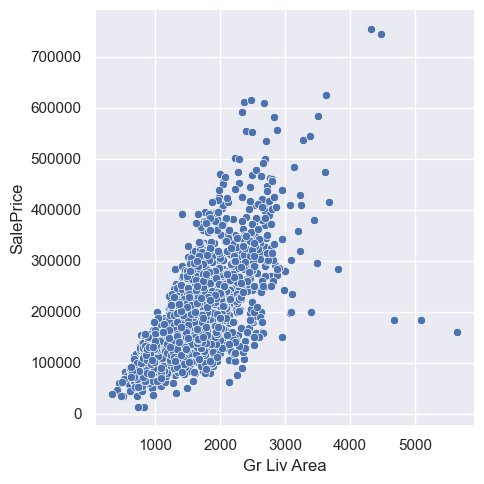

In [13]:
sns.set_theme()
sns.relplot(data=housing, x='Gr Liv Area', y='SalePrice')
plt.show()

There is positive correlation between Living Area and Saleprice

### SalePrice vs Gr Liv Area and Overall Quality

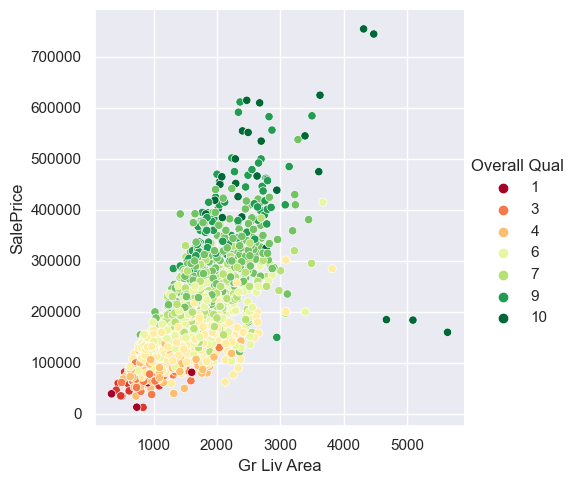

In [14]:
sns.relplot(data=housing, x='Gr Liv Area', y='SalePrice',
            hue='Overall Qual', palette='RdYlGn')
plt.show()

* Houses with smaller living areas aboveground typically have a lower overall quality
* Very rarely, we see high-quality houses with a high living area aboveground (over 4,000 square feet) sold at relatively low prices (under 200,000 USD)

### Adding Garage Area

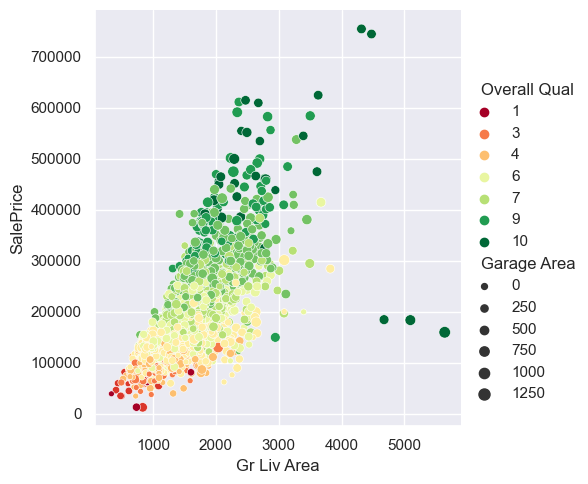

In [15]:
sns.relplot(data=housing, x='Gr Liv Area', y='SalePrice',
            hue='Overall Qual', palette='RdYlGn',
            size='Garage Area')
plt.show()

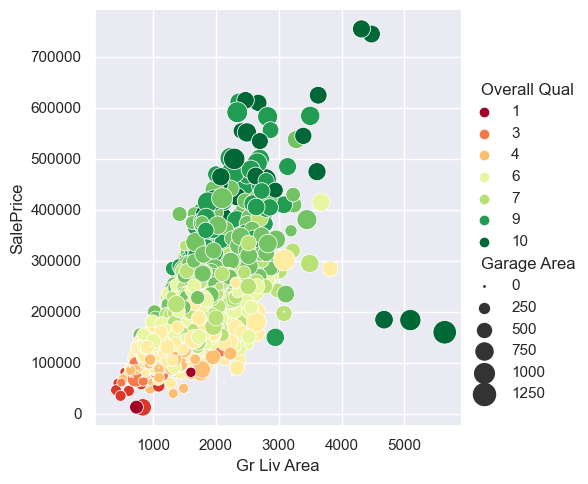

In [16]:
sns.relplot(data=housing, x='Gr Liv Area', y='SalePrice',
            hue='Overall Qual', palette='RdYlGn',
            size='Garage Area', sizes=(1,300))
plt.show()

Houses with an overall quality of nine or ten typically have garage areas greater than 500 square feet, living areas aboveground greater than 2,000 feet, and sell for more than 400,000 USD

### Adding Rooms

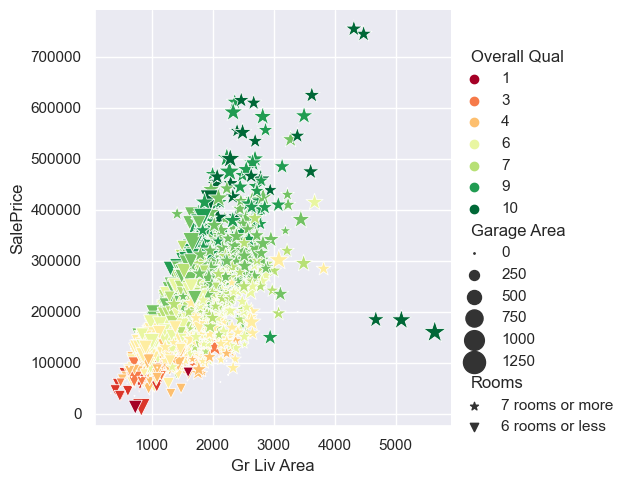

In [17]:
sns.relplot(data=housing, x='Gr Liv Area', y='SalePrice',
            hue='Overall Qual', palette='RdYlGn',
            size='Garage Area', sizes=(1,300),
            style='Rooms', markers=['*','v'])
plt.show()

### Adding Year

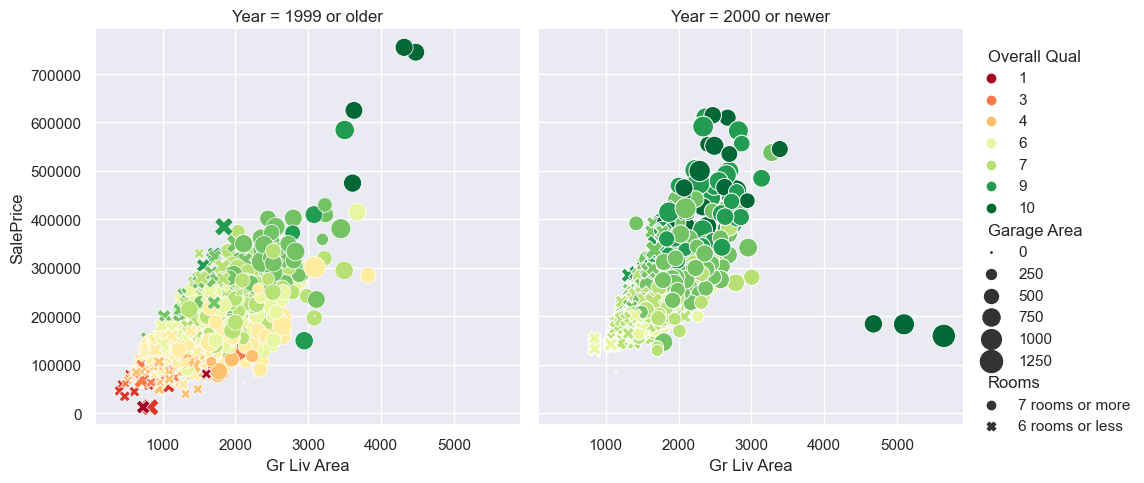

In [18]:
sns.relplot(data=housing, x='Gr Liv Area', y='SalePrice',
            hue='Overall Qual', palette='RdYlGn',
            size='Garage Area', sizes=(1,300),
            style='Rooms', col='Year')
plt.show()

### Conclusion
* Most houses built in 2000 or later have a living area aboveground between 1,000 and 3,000 square feet and sell for more than 100,000 USD
* Most of the houses with an overall quality rating of four or less were built in 1999 or earlier, have low garage area and six rooms or less